# Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Reading Dataset

In [2]:
df=pd.read_csv("diabetes.csv")
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [3]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [4]:
df.shape

(768, 9)

#### Observation:
- So there are 9 features in this dataset in which 8 are input features and 1 is output variable(Outcome)


In [5]:
X=df.drop(["Outcome"],axis=1)
Y=df["Outcome"]

# Feature Selection
To find the best set of features that allows one to build optimized models of studied phenomena.

### Why feature Selection is required?
In real life data science problems, it's almost rare that all the variables in the dataset are useful for building a model.
Adding reduntant variables can:
1. Reduce the model's generalization capability
   
2. Reduce the overall accuracy of the model

3. Increase the complexity of model.

### Goal of feature Selection:
1. To reduce the dimensionality of feature space.

2. To speed up a learning algorithm.

3. To improve the predictive accuracy of a classification algorithm.

4. To improve the comprehensibility of the learning re

### Feature Selection Techniques
Some popular techniques of feature selection in machine learning are:
- **Filter methods**
- **Wrapper methods**
- **Embedded methods**sults.sults.

# 1) Filter Methods:
- Use feature goodness score
- It evaluates feature relevance independently of the model using statistical technique

### Advantages:
- It is fast and efficient
- Do not require model training
- Works well with high-dimensional data

### Disadvantage:
- May select reduntant feature that are individually relevant

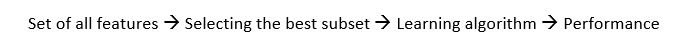

There are various filter methods:
1. Information gain
2. Chi-square Test
3. Fisher's score
4. Correlation coefficient
5. Variance Threshold
6. Mean Absolute Difference
7. Dispersion Ratio

### 1.1) Information Gain:
It is defined as the amount of information provided by the feature for identifying the target value and measures reduction in the entropy values. Information gain of each attribute is calculated considering the target values for feature selection.

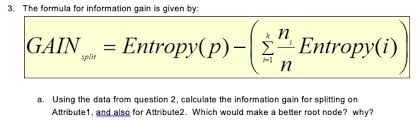

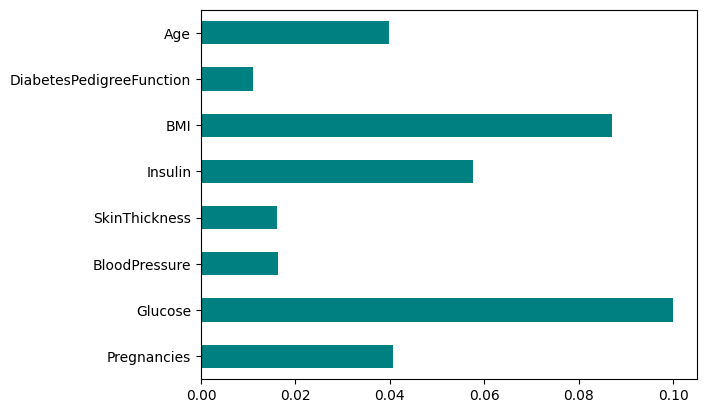

In [6]:
from sklearn.feature_selection import mutual_info_classif
import matplotlib.pyplot as plt
%matplotlib inline

importances = mutual_info_classif(X, Y)
feat_importances = pd.Series (importances, df.columns[0:len(df.columns)-1])
feat_importances.plot(kind='barh', color = 'teal')
plt.show()

Glucose, BMI and Age has highest information about Outcome

### 1.2) Chi-square test:
Chi-square method (X2) is generally used to test the relationship between categorical variables. It compares the observed values from different attributes of the dataset to its expected value.

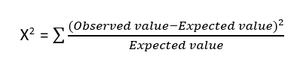

In [7]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

# Convert to categorical data by converting data to integers
X_cat =X.astype(int)

# Three features with highest chi-squared statistics are selected
chi2_features =SelectKBest (chi2, k = 3)
X_kbest_features= chi2_features.fit_transform(X_cat, Y)

# Reduced features
print('Original feature number:', X_cat.shape[1])
print('Reduced feature number:', X_kbest_features.shape[1])

Original feature number: 8
Reduced feature number: 3


### 1.3) Fisher's score:
Fisher’s Score selects each feature independently according to their scores under Fisher criterion leading to a suboptimal set of features. The larger the Fisher’s score is, the better is the selected feature.

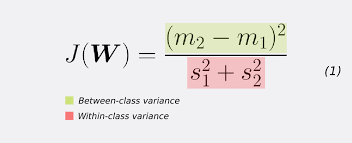

In [8]:
!pip install git+https://github.com/jundongl/scikit-feature.git

Defaulting to user installation because normal site-packages is not writeable
  Cloning https://github.com/jundongl/scikit-feature.git to c:\users\sarthak aggarwal\appdata\local\temp\pip-req-build-n419xu2p
  Resolved https://github.com/jundongl/scikit-feature.git to commit 48cffad4e88ff4b9d2f1c7baffb314d1b3303792
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Created wheel for skfeature: filename=skfeature-1.0.0-py3-none-any.whl size=62029 sha256=815ce90df7ee342369d3d729be66ebcec6dcd6b20e77500081c6d82d46efce72
  Stored in directory: C:\Users\Sarthak Aggarwal\AppData\Local\Temp\pip-ephem-wheel-cache-lrt76tu2\wheels\b3\37\51\a4af5dad3309cbb9797e4db0f6fe3cf084ab0739d8530976e6
Successfully built skfeature


  Running command git clone --filter=blob:none --quiet https://github.com/jundongl/scikit-feature.git 'C:\Users\Sarthak Aggarwal\AppData\Local\Temp\pip-req-build-n419xu2p'


In [ ]:
from skfeature.function.similarity_based import fisher_score
import matplotlib.pyplot as plt
%matplotlib inline

# Calculating scores
ranks= fisher_score.fisher_score (X, Y)

# Plotting the ranks
feat_importances =pd.Series(ranks, df.columns [0:len (df.columns)-1])
feat_importances.plot(kind='barh', color= 'teal')
plt.show()

### 1.4 Correlation coeffiient
Pearson’s Correlation Coefficient is a measure of quantifying the association between the two continuous variables and the direction of the relationship with its values ranging from -1 to 1.

<Axes: >

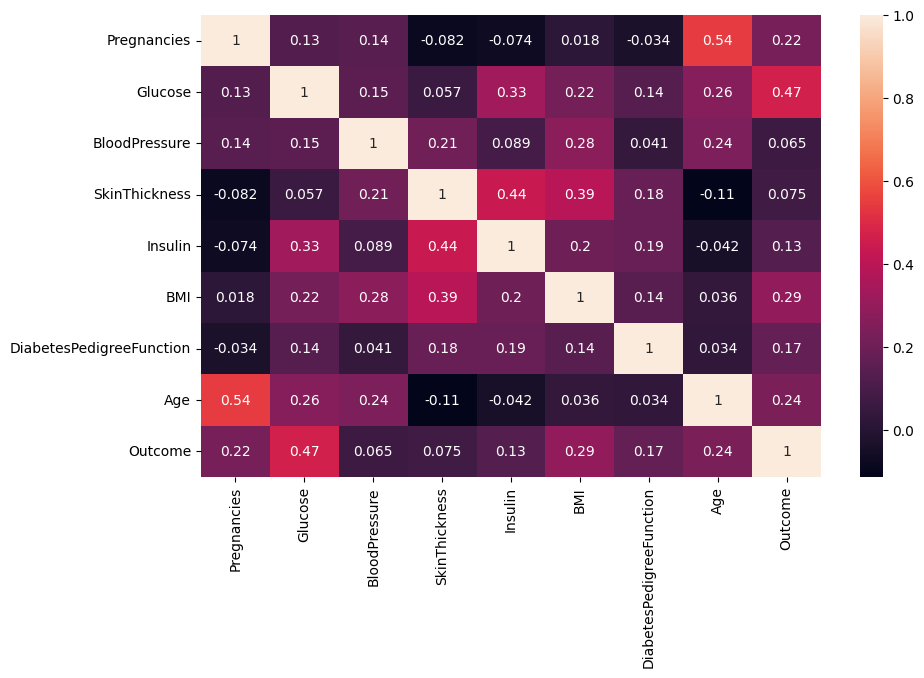

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# correlation matrix
cor=df.corr()

# Plotting Heatmap
plt.figure(figsize=(10,6))
sns.heatmap(cor, annot =True)

### 1.5) Variance Threshold
It is an approach where all features are removed whose variance doesn’t meet the specific threshold. By default, this method removes features having zero variance. The assumption made using this method is higher variance features are likely to contain more information.

In [14]:
from sklearn.feature_selection import VarianceThreshold

v_threshold = VarianceThreshold(threshold=0)
v_threshold.fit(X) # fit finds the features with zero variance
v_threshold.get_support()

array([ True,  True,  True,  True,  True,  True,  True,  True])

The get_support returns a Boolean vector where True means the variable does not have zero variance.

### 1.6) Mean Absolute difference
‘The mean absolute difference (MAD) computes the absolute difference from the mean value. The main difference between the variance and MAD measures is the absence of the square in the latter. The MAD, like the variance, is also a scaled variant.’This means that the higher the MAD, the higher the discriminatory power.

<BarContainer object of 8 artists>

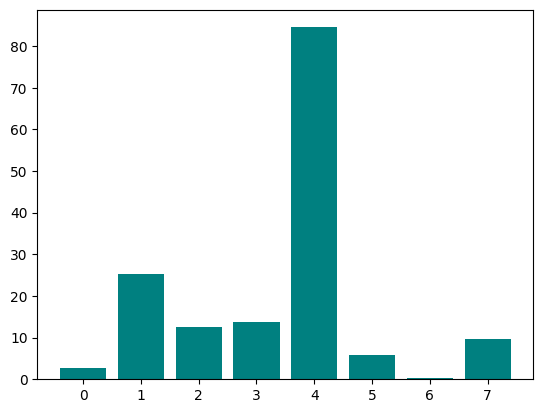

In [15]:
mean_abs_diff=np.sum(np.abs(X-np.mean(X,axis=0)),axis=0)/X.shape[0]

#plot
plt.bar(np.arange(X.shape[1]),mean_abs_diff,color='teal')

### 1.7) Dispersion Ratio
Dispersion ratio is defined as the ratio of the Arithmetic mean (AM) to that of Geometric mean (GM) for a given feature. Its value ranges from +1 to ∞ as AM ≥ GM for a given feature. Higher dispersion ratio implies a more relevant feature.

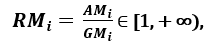

C:\ProgramData\anaconda3\Lib\site-packages\numpy\core\_methods.py:53: RuntimeWarning: overflow encountered in reduce
  return umr_prod(a, axis, dtype, out, keepdims, initial, where)


<BarContainer object of 8 artists>

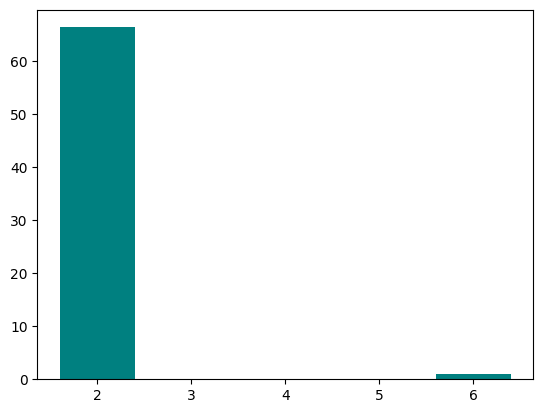

In [18]:
X = X+1 # To avoid 0 for denominator
#Arithmetic Mean
am = np.mean (X, axis =0)

#Geometric Mean
gm = np.power (np.prod(X, axis= 0),1/X.shape[0]) 

# Ratio of Arithmetic Mean and Geometric Mean
disp_ratio = am/gm

# Plotting the bar chart
plt.bar(np.arange(X.shape[1]), disp_ratio, color = 'teal')

## 2. Wrapper methods
- Use ML methods to sequentially identify best subset of features
- Follows **Greedy search approach** by evaluating all ossible combination of features against the evaluation metrices.

#### It usually gives better results than filter methods

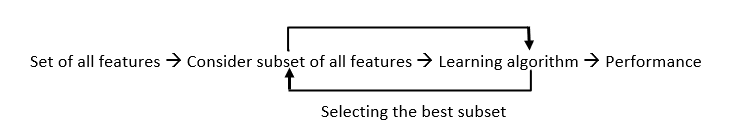

There are various Wrapper methods:
1. Forward Feature selection
2. Backward elimination
3. Exhaustive selection
4. Recursive Elimination

### 2.1) Forward feature selection
- This method is an iterative approach where we initially start with an empty set of features and keep adding a feature which best improves our model after each iteration. 
- The stopping criterion is till the addition of a new variable does not improve the performance of the model.

In [27]:
from mlxtend.feature_selection import SequentialFeatureSelector
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=42)

# Initialize the Logistic Regression model
lr = LogisticRegression()

# Forward Feature Selection
ffs = SequentialFeatureSelector(lr, k_features='best', forward=True, n_jobs=-1)
ffs.fit(X_train, y_train)

# Get the selected feature names
features = list(ffs.k_feature_names_)

# Apply feature selection to training and test sets
X_train_selected = X_train[features]
X_test_selected = X_test[features]

# Train the model with selected features
lr.fit(X_train_selected, y_train)

# Predict on the test set
y_pred = lr.predict(X_test_selected)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

Accuracy: 0.74


### 2.2) Backward elimination technique
- This method is also an iterative approach where we initially start with all features and after each iteration, we remove the least significant feature.
- The stopping criterion is till no improvement in the performance of the model is observed after the feature is removed.

In [29]:
from mlxtend.feature_selection import SequentialFeatureSelector
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=42)

# Initialize the Logistic Regression model
lr = LogisticRegression()

# Backward Feature Elimination
# Set forward=False to perform backward elimination
bfe = SequentialFeatureSelector(lr, k_features='best', forward=False, n_jobs=-1)
bfe.fit(X_train, y_train)

# Get the selected feature names
features = list(bfe.k_feature_names_)

# Apply feature selection to training and test sets
X_train_selected = X_train[features]
X_test_selected = X_test[features]

# Train the model with selected features
lr.fit(X_train_selected, y_train)

# Predict on the test set
y_pred = lr.predict(X_test_selected)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

C:\Users\Sarthak Aggarwal\AppData\Roaming\Python\Python311\site-packages\sklearn\model_selection\_validation.py:73: FutureWarning: `fit_params` is deprecated and will be removed in version 1.6. Pass parameters via `params` instead.
  warnings.warn(
C:\Users\Sarthak Aggarwal\AppData\Roaming\Python\Python311\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Sarthak Aggarwal\AppData\Roaming\Python\Python311\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED 

Accuracy: 0.73


### 2.3) Exhaustive selection
- This technique is considered as the brute force approach for the evaluation of feature subsets. 
- It creates all possible subsets and builds a learning algorithm for each subset and selects the subset whose model’s performance is best.

In [ ]:
# Exhaustive Feature Selection
from mlxtend.feature_selection import ExhaustiveFeatureSelector

# import the algorithm you want to evaluate on your features.
from sklearn.ensemble import RandomForestClassifier

# create the Exhaustive FeatureSelector object.
efs = ExhaustiveFeatureSelector(RandomForestClassifier(), min_features=4,max_features=8,scoring='roc_auc',cv=2)

# fit the object to the training data.
efs = efs.fit(X, Y)

# print the selected features.
selected_features = x_train.columns[list(efs.best_idx_)]
print(selected_features)

print(efs.best_score_)

It is very time taking as it evaluates every possible way

### 2.4) Recursive elimination
This greedy optimization method selects features by recursively considering the smaller and smaller set of features. The estimator is trained on an initial set of features and their importance is obtained using feature_importance_attribute. The least important features are then removed from the current set of features till we are left with the required number of features.

In [33]:
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score


# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=42)

# Initialize the Random Forest Classifier model
model = RandomForestClassifier()

# Initialize the RFE object with the model and the number of features to select
rfe = RFE(estimator=model, n_features_to_select=5)  # Specify the number of features to select

# Fit the RFE object to the training data
rfe.fit(X_train, y_train)

# Get the selected feature indices
selected_features = X_train.columns[rfe.support_]

print("Selected features:", selected_features)

# Train the model with selected features
model.fit(X_train[selected_features], y_train)

# Predict on the test set
y_pred = model.predict(X_test[selected_features])

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

Selected features: Index(['Glucose', 'BloodPressure', 'BMI', 'DiabetesPedigreeFunction', 'Age'], dtype='object')
Accuracy: 0.74


## 3. Embedded Methods
- It merges the advantages of filter and wrapper methods
- Computation time is less
- More accurate than filter and wrapper and take into consideration a combination of feature as well

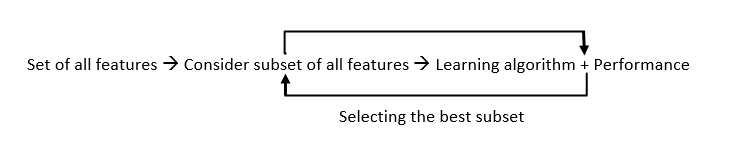

Various methods are:
1. Lasso regularization
2. Random forest Importance

### 3.1) Lasso regularization
- Regularization used for avoiding overfitting of model by adding a penalty term
- Penalty is applied over the coefficients, thus bringing downs some Coefficient to zero
- **Features having zero coefficients** can be removed from the dataset.

In [39]:
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import SelectFromModel

# Set the regularization parameter C=1
logistic = LogisticRegression(C=1, penalty="l1", solver='liblinear', random_state=7)
logistic.fit(X, Y)
model = SelectFromModel(logistic, prefit=True)

X_new = model.transform(X)

# Dropped columns have values of all 0s, keep other columns
selected_columns = X.columns[X.var() != 0]
selected_columns

C:\Users\Sarthak Aggarwal\AppData\Roaming\Python\Python311\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(


Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age'],
      dtype='object')

### 3.2) Random forest importance
- Random Forests is a kind of Bagging Algorithm that aggregates a specified number of decision trees. 
- The tree-based strategies used by random forests naturally rank by how well they improve the purity of the node, or in other words, a decrease in the impurity (Gini impurity) over all trees. 
- Nodes with the greatest decrease in impurity happen at the start of the trees, while notes with the least decrease in impurity occur at the end of the trees. 
- Thus, by pruning trees below a particular node, we can create a subset of the most important features.

<Axes: >

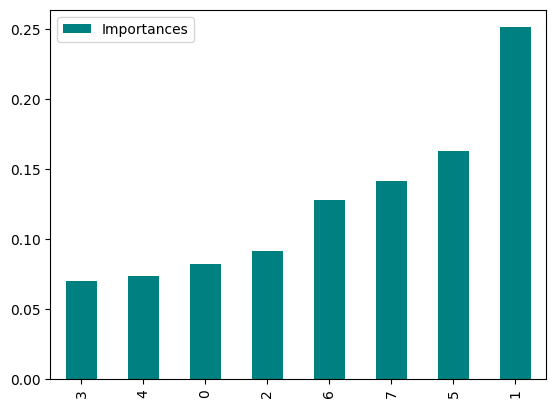

In [42]:
from sklearn.ensemble import RandomForestClassifier

#create the random forest with your hyperparameters.
model =RandomForestClassifier(n_estimators=340)

# fit the model to start training.
model.fit(X, Y)

#get the importance of the resulting features.
importances =model.feature_importances_

#create a data frame for visualization.
final_df =pd.DataFrame({"Features": pd.DataFrame(X).columns, "Importances": importances})
final_df.set_index('Importances')

#sort in ascending order to better visualization.
final_df= final_df.sort_values("Importances")

# plot the feature importances in bars.
final_df.plot.bar(color = "teal")

## Feature Selection vs Dimensionalty Reduction

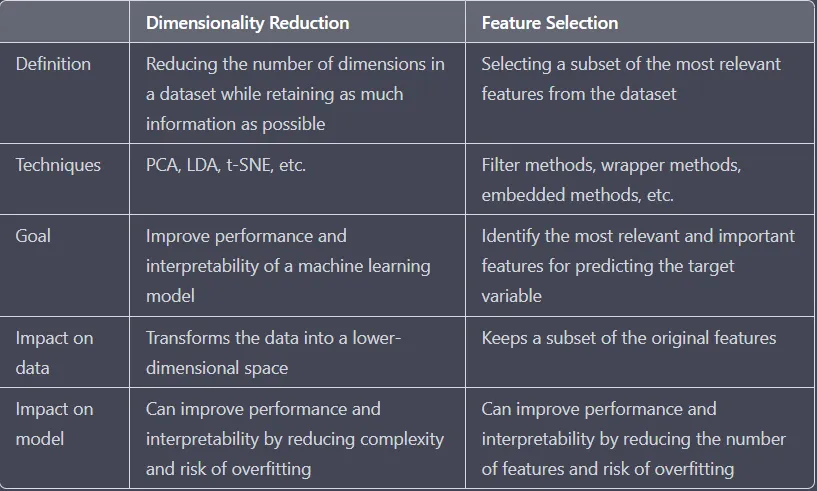

# Conclusion
Apart from the methods discussed above, there are many other methods of feature selection. Using hybrid methods for feature selection can offer a selection of best advantages from other methods, leading to reduce in the disadvantages of the algorithms. These models can provide greater accuracy and performance when compared to other methods. Dimensionality reduction techniques such as Principal Component Analysis (PCA), Heuristic Search Algorithms, etc. don’t work in the way as to feature selection techniques but can help us to reduce the number of features.  

### Key takeaways:
- Understanding the importance of feature selection and feature engineering in building a machine learning model.
- 
Familiarizing with different feature selection techniques, including supervised techniques (Information Gain, Chi-square Test, Fisher’s Score, Correlation Coefficient), unsupervised techniques (Variance Threshold, Mean Absolute Difference, Dispersion Ratio), and their classifications (Filter methods, Wrapper methods, Embedded methods, Hybrid methods)
- 
Evaluating the performance of feature selection techniques in practice through implementation.